In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('data/label_renamed.pkl')

In [3]:
df['Dominant_Topic'].nunique()

11

In [4]:
df

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,hashtags
0,0,Destruction/Consequences,0.2297,"global, warming, park, stop, joshua, admin, na...","[global, wine, production, reach, new, low, ch...",climatechange wine plastics
1,1,News/Media,0.2824,"threat, news, happening, temperature, day, fac...","[im, dismissing, crazy, conspiracy, im, dismis...",NaN
2,2,Belief/Sentiment,0.4131,"world, trump, head, president, study, way, sup...","[let, turn, thing, around]",ProtectWhatYouLove ActOnClimate Sustainability...
3,3,Arctic/Icecap,0.5074,"it, time, year, arctic, planet, weather, probl...","[new, approach, globalwarming, projection, reg...",NaN
4,4,ClimateChangeIsReal/FightClimateChange,0.7851,"climate, change, zinke, real, human, talk, wor...","[child, estimated, bear, burden, disease, rela...",NaN
...,...,...,...,...,...,...
2999958,2999958,Arctic/Icecap,0.2953,"it, time, year, arctic, planet, weather, probl...","[thank, important, thread, major, danger, planet]",ClimateChange
2999966,2999966,Belief/Sentiment,0.2710,"world, trump, head, president, study, way, sup...","[decision, unilaterally, dismiss, agreement, s...",NaN
2999975,2999975,Action/Efforts/Awareness,0.0667,"amp, action, leader, tweet, thanks, away, summ...","[sarah, sander]",ALSenate RoyMoore FollowTheWhiteRabbit QAnon U...
2999981,2999981,Belief/Sentiment,0.2273,"dont, good, like, think, people, want, know, l...","[let, moment, realize, people, denying, climat...",NaN


In [5]:
# Fix Text column (from list to string)
df['TextString'] = [' '.join(map(str, l)) for l in df['Text']]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['TextString'])
labels = df.Dominant_Topic
features.shape

(799038, 252314)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['TextString'], df['Dominant_Topic'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

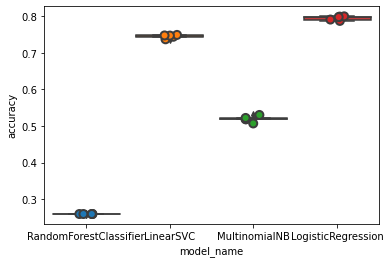

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

models = [
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(max_iter=1000, random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [9]:
#Accuracy reportfor each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.745236
LogisticRegression        0.795301
MultinomialNB             0.519288
RandomForestClassifier    0.259242
Name: accuracy, dtype: float64